BRUNO DA SILVA 396433 - CK0223

# Decision Tree

### Atividades

1. Utilizamos a medida de Entropia como fator de decisão (medida de impureza de um nó). Teste o mesmo conjunto 
randômico de dados para a medida Gini e compare os resultados.
Ref1.: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
Ref2.: https://en.wikipedia.org/wiki/Decision_tree_learning

2. Faça o balanceamento dos dados contidos em "train.csv", aplique o algoritmo de Decision Tree e faça a submissão no kaggle. Tente melhorar o resultado obtido em sala de aula (posição 3100 no leaderboard).
Dataset: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

3. (Opcional) Execute uma Random Forest na competição do Kaggle e veja se a acurácia melhora. Utilize 10, 100 ou 1000 árvores (dependendo de quanto o seu computador aguentar =]): http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [23]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image 
from sklearn import tree
import pandas as pd
import numpy as np
import pydotplus
import math
import io
import os

In [24]:
headers = ["buying", "maint", "doors", "persons","lug_boot", "safety", "class"]
data = pd.read_csv("car_data.csv", header=None, names=headers)

data = data.sample(frac=1).reset_index(drop=True) # shuffle

In [25]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,high,high,3,2,small,high,unacc
1,low,low,5more,more,big,med,good
2,high,med,2,2,big,low,unacc
3,low,high,2,more,med,med,acc
4,low,high,2,more,small,high,unacc


In [26]:
for h in headers:
    data[h] = data[h].astype('category')
    data[h] = data[h].cat.codes

data.set_index("class", inplace=True)
data.head()

,buying,maint,doors,persons,lug_boot,safety
class,,,,,,
2,0,0,1,0,2,0
1,1,1,3,2,0,2
2,0,2,0,0,0,1
0,1,0,0,2,1,2
2,1,0,0,2,2,0


In [27]:
size = len(data)
train_size = int(math.floor(size * 0.7))
train_data = data[:train_size]
test_data = data[train_size:]

### Critério: Entropia



In [28]:
d_tree1 = DecisionTreeClassifier(criterion="entropy")
d_tree1.fit(train_data, train_data.index) 


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
d_tree1.predict(test_data.iloc[:, 0:6])
d_tree1.score(test_data, test_data.index)

0.97302504816955682

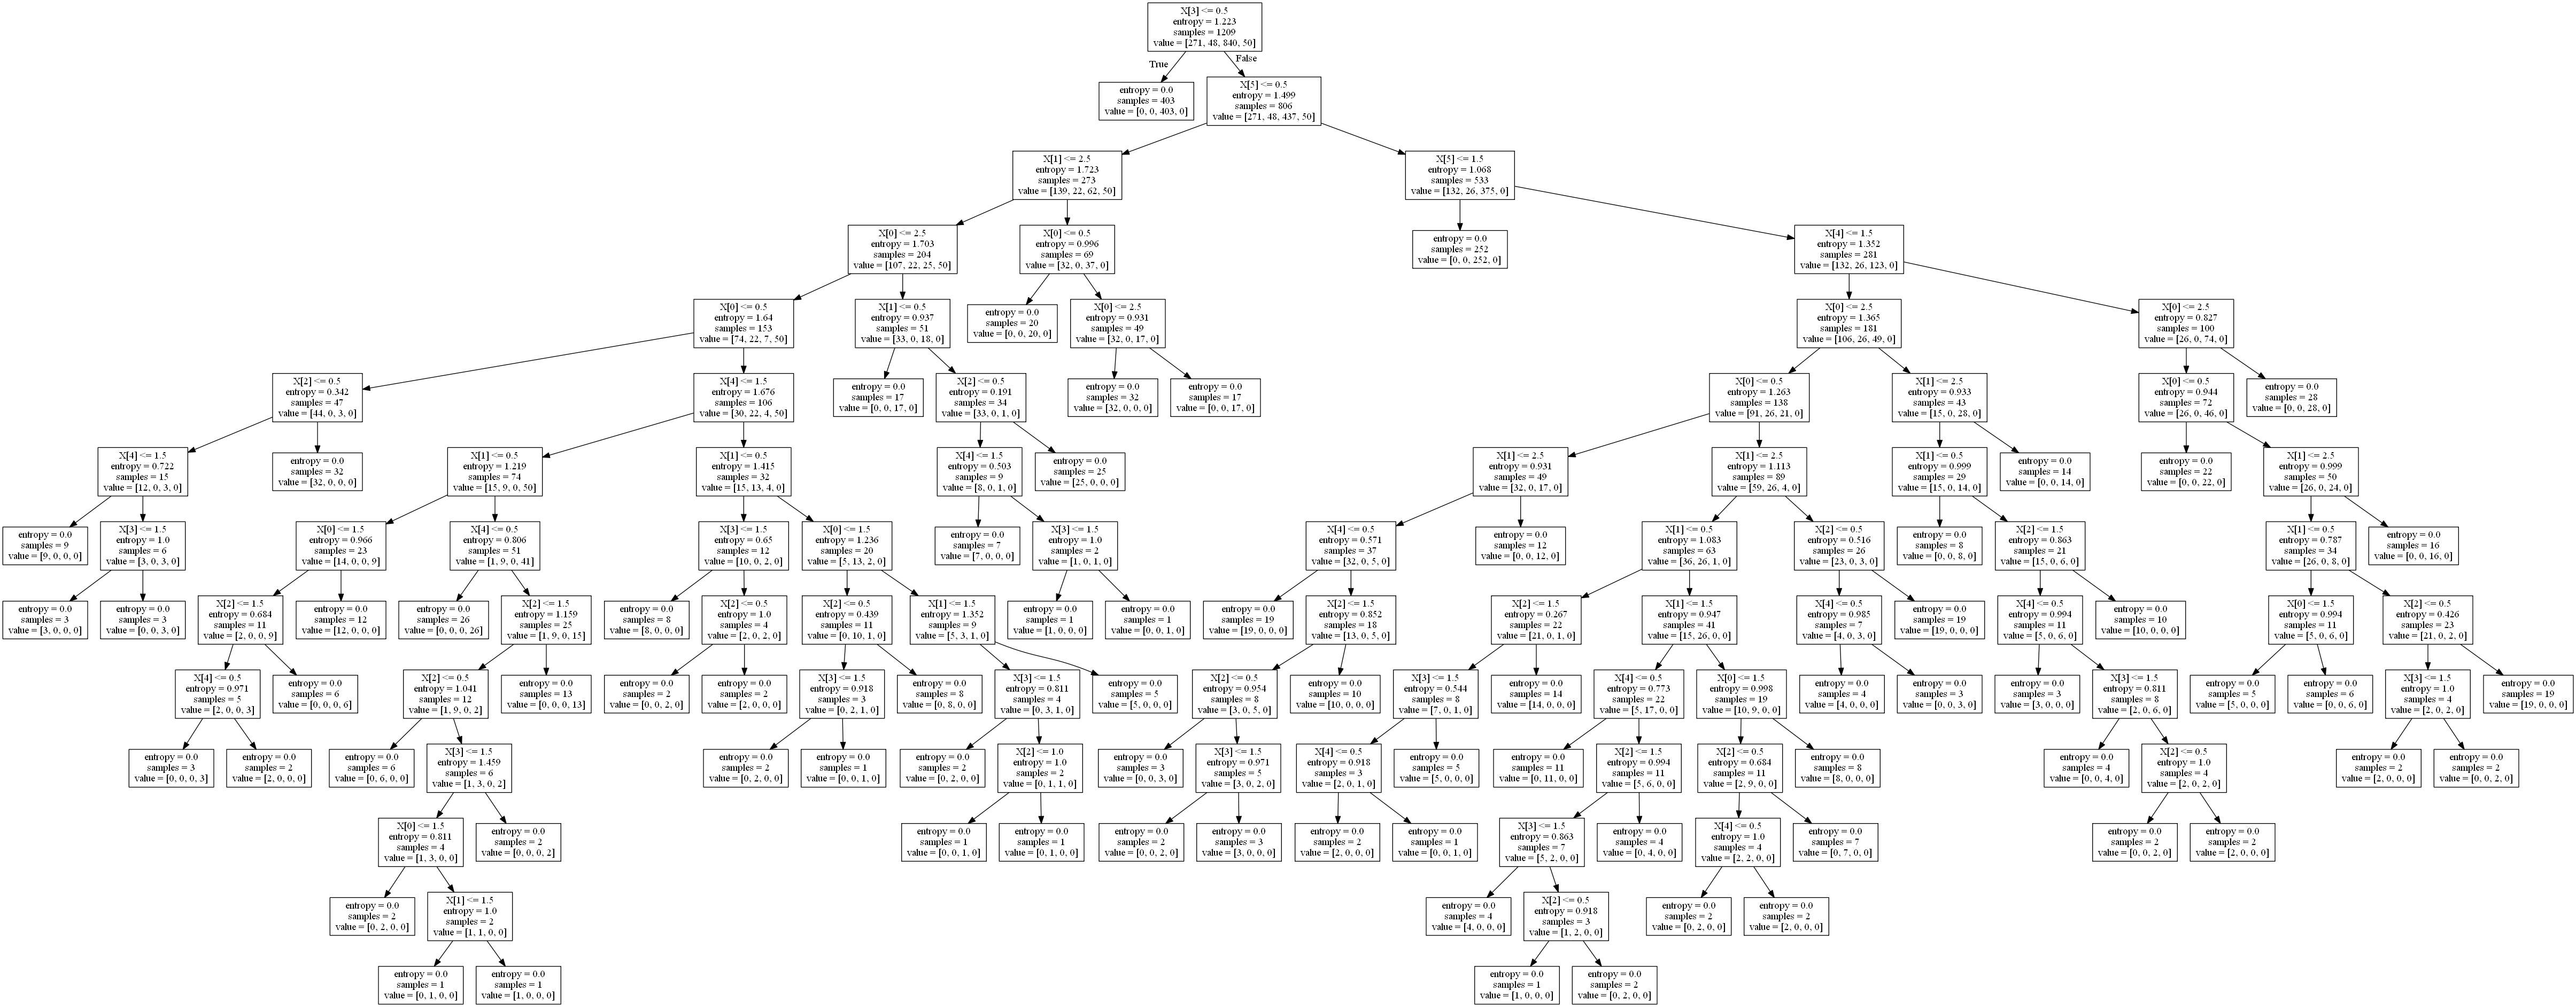

In [30]:
dotfile = io.StringIO()
tree.export_graphviz(d_tree1, out_file=dotfile)
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("d_tree1.png")
Image(filename='d_tree1.png')

### Critério: Gini

In [31]:
d_tree2 = DecisionTreeClassifier(criterion="gini")
d_tree2.fit(train_data, train_data.index) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
d_tree2.predict(test_data.iloc[:, 0:6])
d_tree2.score(test_data, test_data.index)

0.96531791907514453

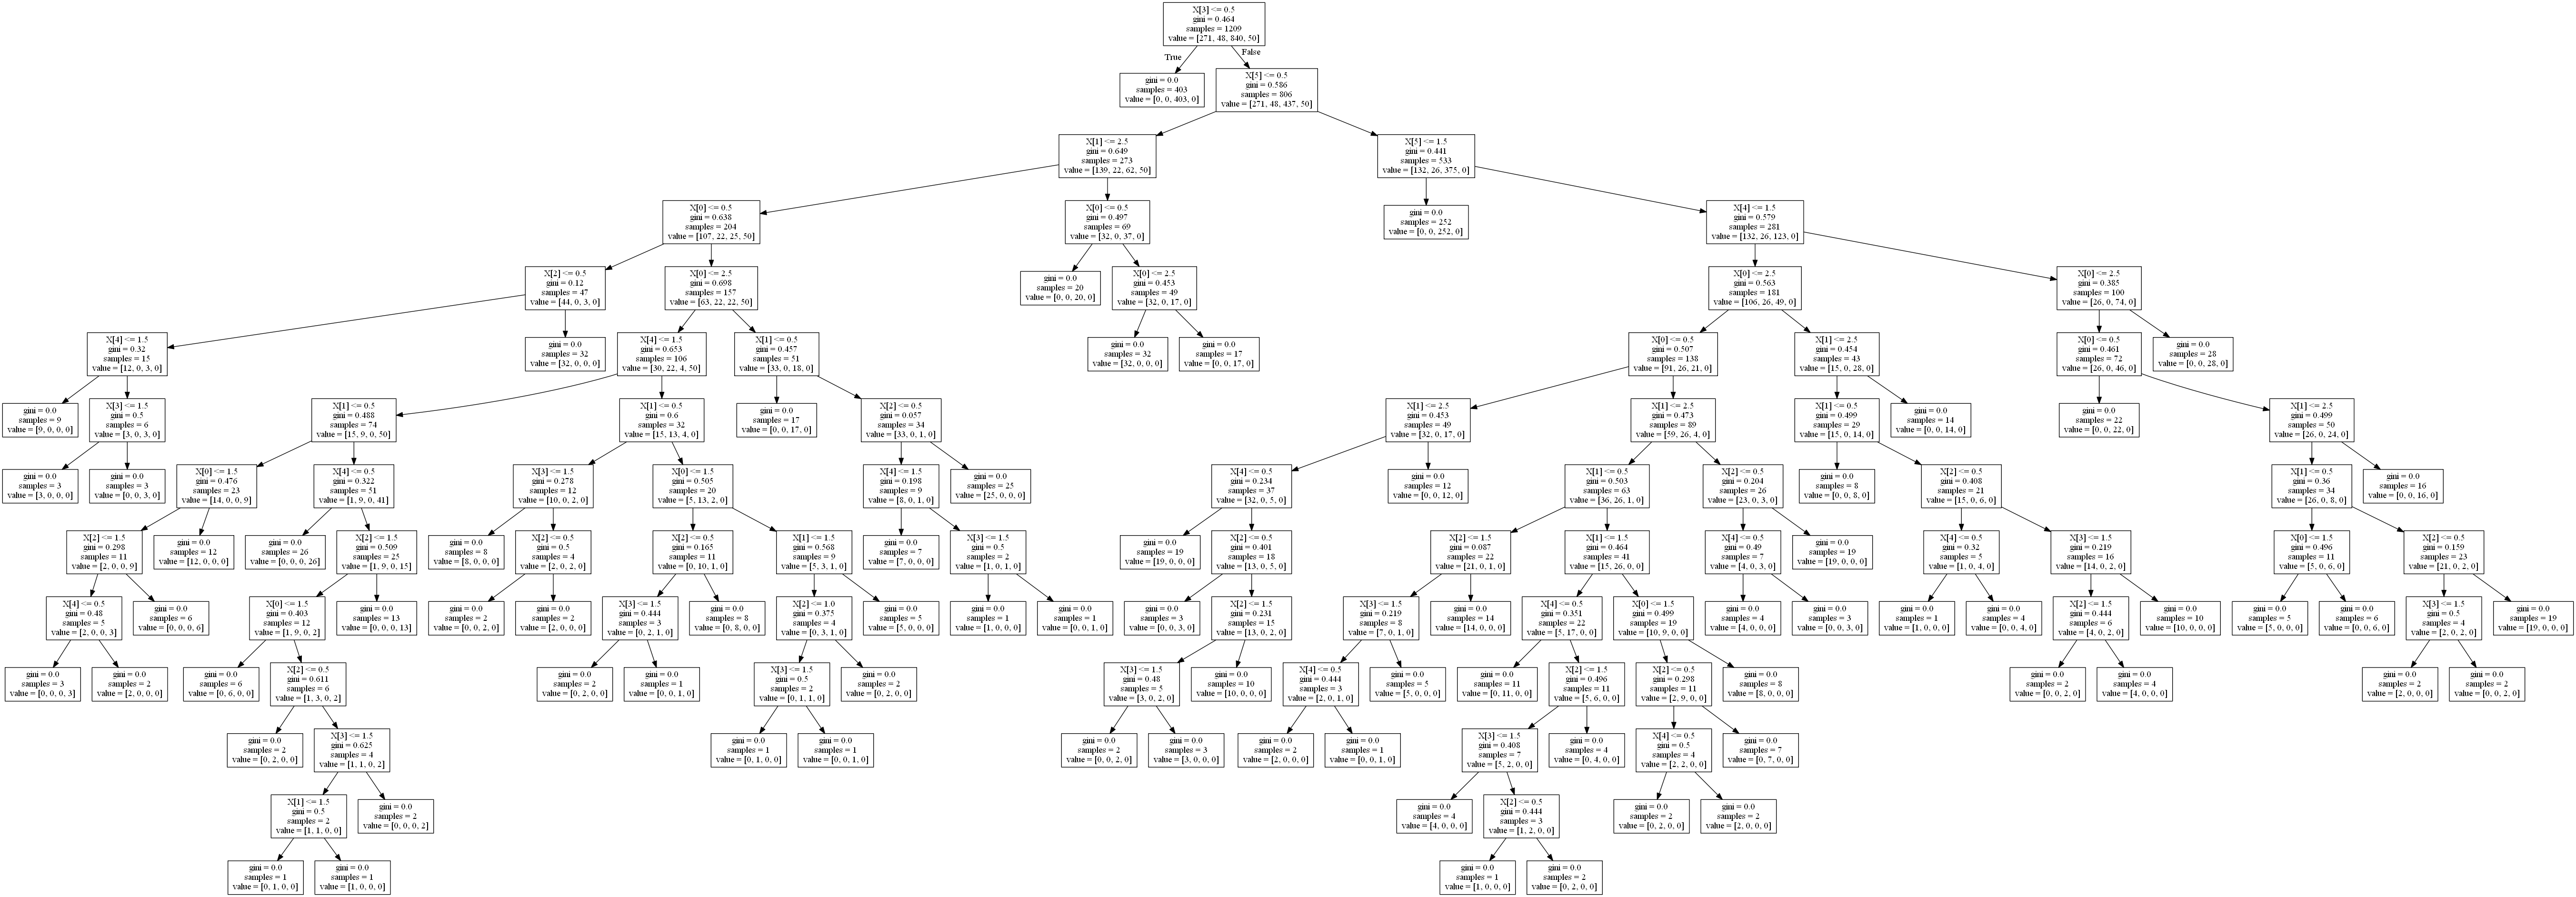

In [33]:
dotfile = io.StringIO()
tree.export_graphviz(d_tree2, out_file=dotfile)
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("d_tree2.png")
Image(filename='d_tree2.png')

"Quando,  nas  árvores  de  classificação  com  partições  binárias,  se  utiliza  o  critério de Gini tende-se a isolar num ramo os registros que representam a classe mais  freqüente.  Quando  se  utiliza  a  entropia,  balanceia-se  o  número  de  registros  em cada ramo."